## Nic ciekawego - sprawdzam czy kod ze stackoverflow działa

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler as PSampler
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.cx(1, 2)
qc.measure_all()

In [2]:
qc.remove_final_measurements()  # no measurements allowed
statevector = Statevector(qc)

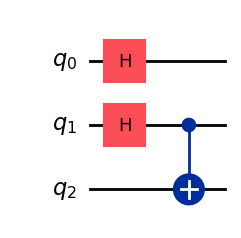

In [3]:
qc.draw('mpl')

In [4]:
print(statevector)

Statevector([0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j,
             0.5+0.j],
            dims=(2, 2, 2))


## Tutaj ciekawsze bo bramki increment i decrement

In [5]:
from qiskit.visualization import circuit_drawer
from qiskit.visualization import plot_histogram


In [6]:

def q_increment(_qc: QuantumCircuit):
    _qc.barrier()
    _qc.ccx(2,1,0)
    _qc.cx(2,1)
    _qc.barrier()
    
    
def q_decrement(_qc: QuantumCircuit):
    _qc.barrier()
    _qc.x(1)
    _qc.x(2)
    _qc.ccx(2,1,0)
    _qc.x(1)
    _qc.cx(2,1)
    _qc.x(2)
    _qc.barrier()


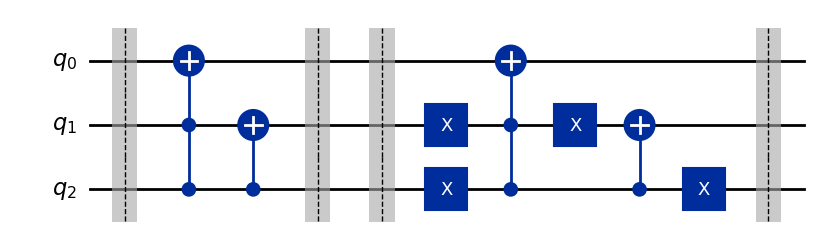

In [7]:
test_circuit = QuantumCircuit(3)
q_increment(test_circuit)
q_decrement(test_circuit)

test_circuit.draw('mpl')

In [8]:
def walker_steps(qr: QuantumRegister, cr: ClassicalRegister, result_circuit: QuantumCircuit, steps: int, measure: bool=False) -> QuantumCircuit:
    for _ in range(steps):
        result_circuit.h(2)
        q_increment(result_circuit)
        q_decrement(result_circuit)
    
    if measure:
        result_circuit.measure(qr[0], cr[0])
        result_circuit.measure(qr[1], cr[1])

    return result_circuit

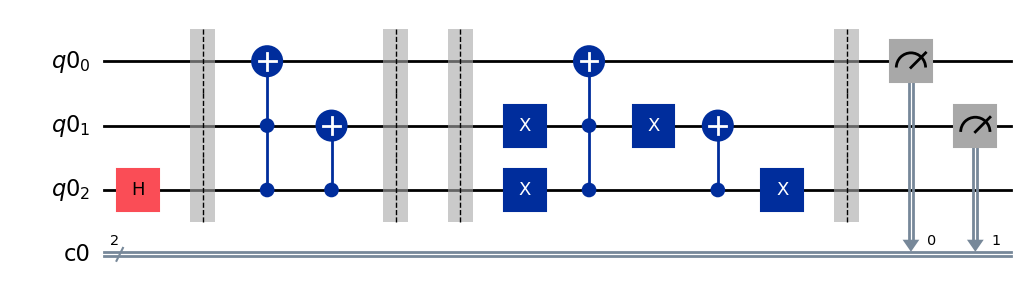

In [9]:
# steps 1

qr1, cr1 = QuantumRegister(3), ClassicalRegister(2)
one_step = QuantumCircuit(qr1, cr1)

walker_steps(qr1, cr1, one_step, 1, True)
one_step.draw('mpl')

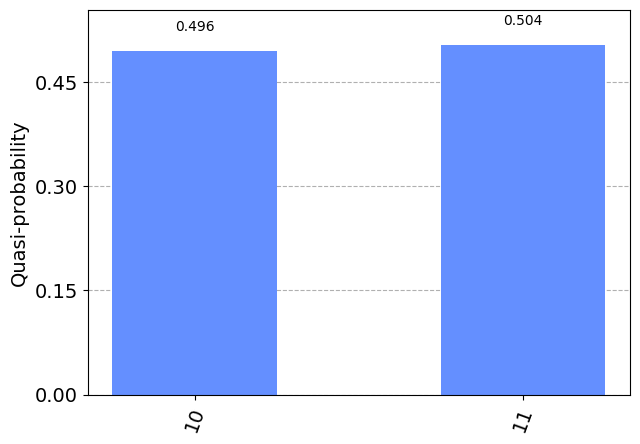

In [10]:
one_sampled = PSampler() \
    .run(one_step, shots=2**11) \
    .result() \
    .quasi_dists[0] \
    .binary_probabilities()
plot_histogram(one_sampled)

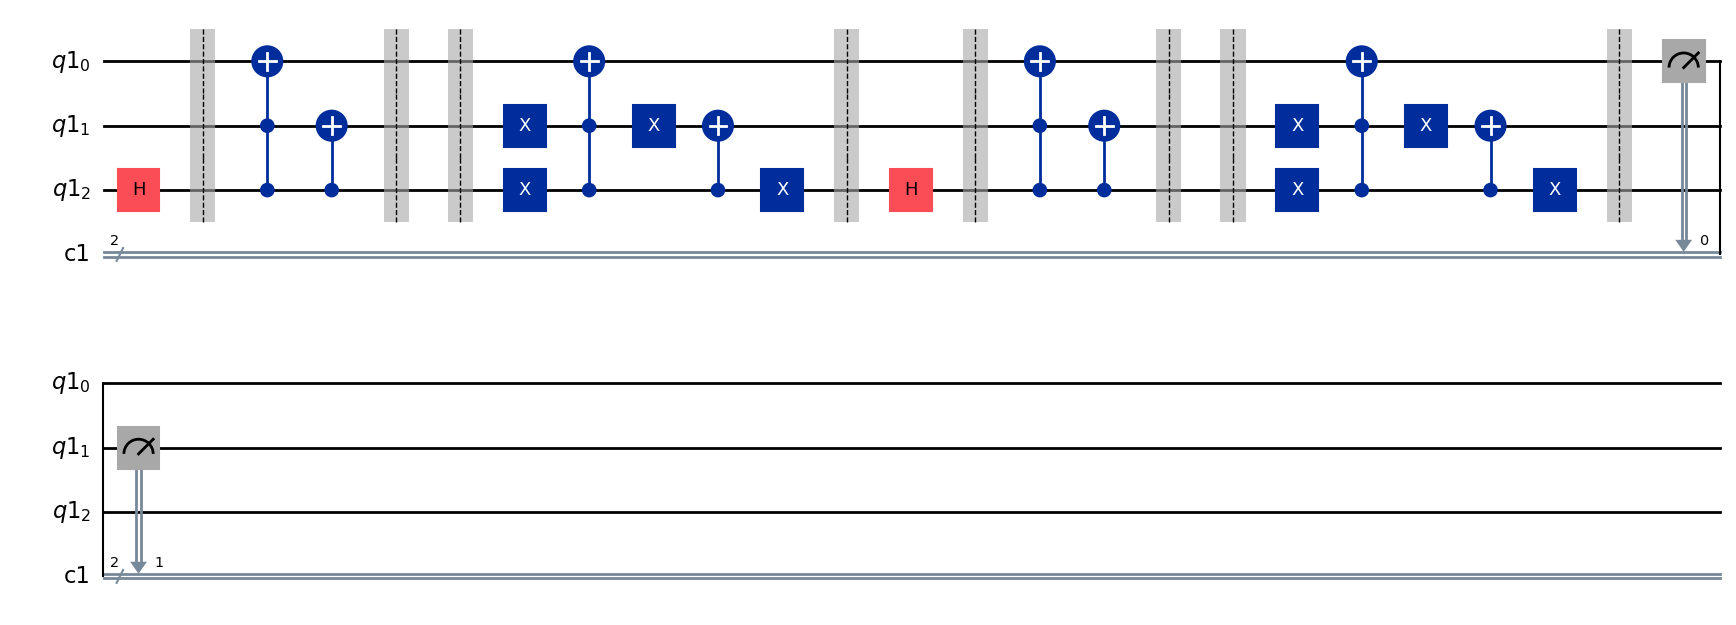

In [11]:
# steps 2

qr2, cr2 = QuantumRegister(3), ClassicalRegister(2)
two_steps = QuantumCircuit(qr2, cr2)

walker_steps(qr2, cr2, two_steps, 2, True)
two_steps.draw('mpl')

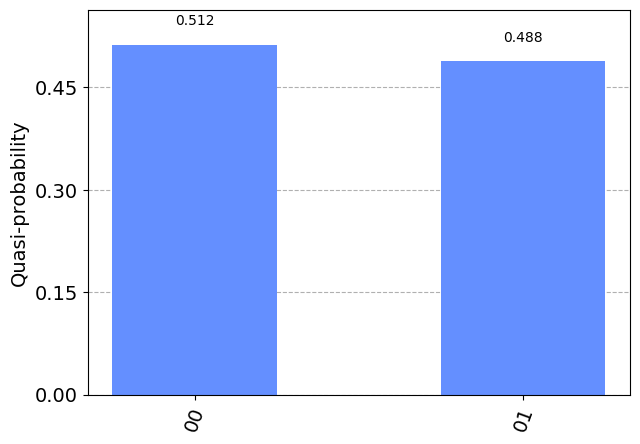

In [12]:
two_sampled = PSampler() \
    .run(two_steps, shots=2**11) \
    .result() \
    .quasi_dists[0] \
    .binary_probabilities()
plot_histogram(two_sampled)

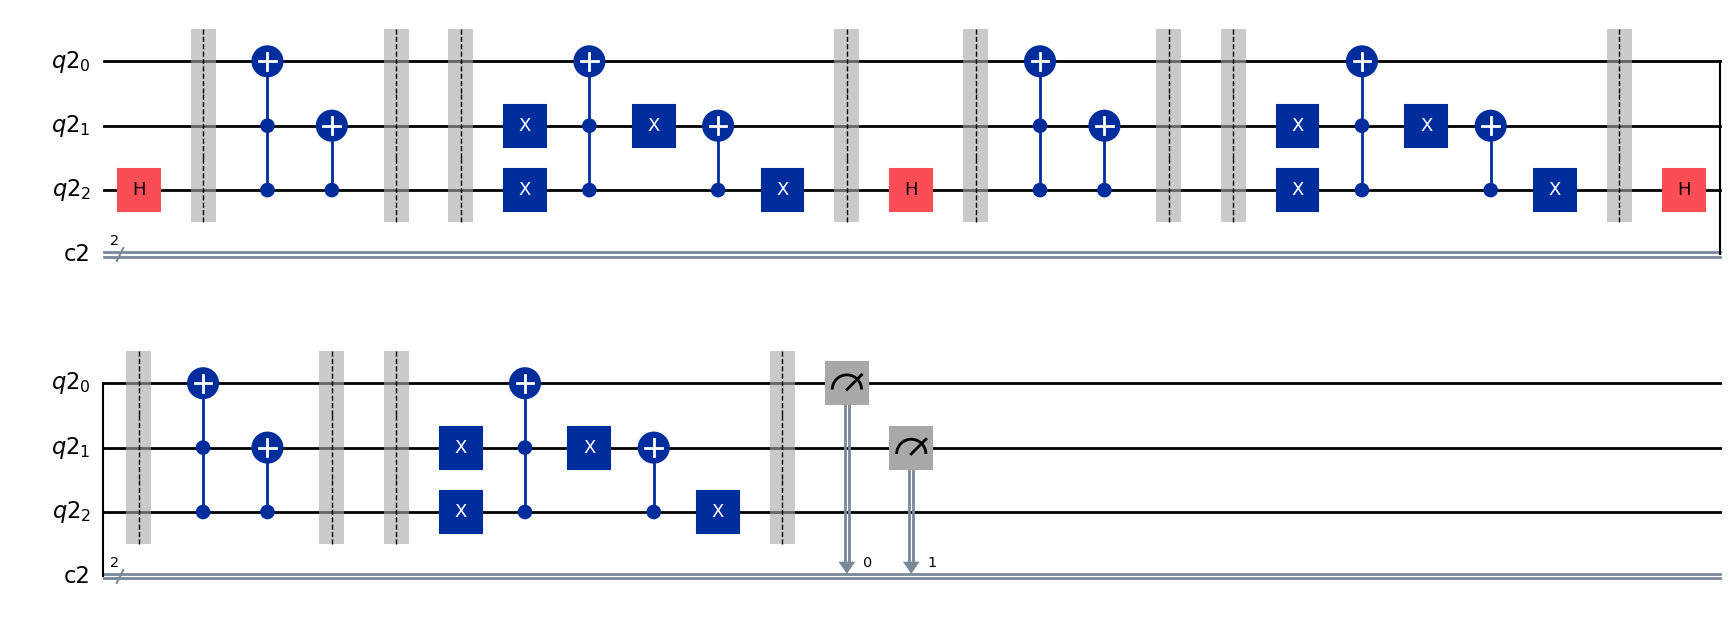

In [13]:
# steps 3

qr3, cr3 = QuantumRegister(3), ClassicalRegister(2)
three_steps = QuantumCircuit(qr3, cr3)

walker_steps(qr3, cr3, three_steps, 3, True)
three_steps.draw('mpl')

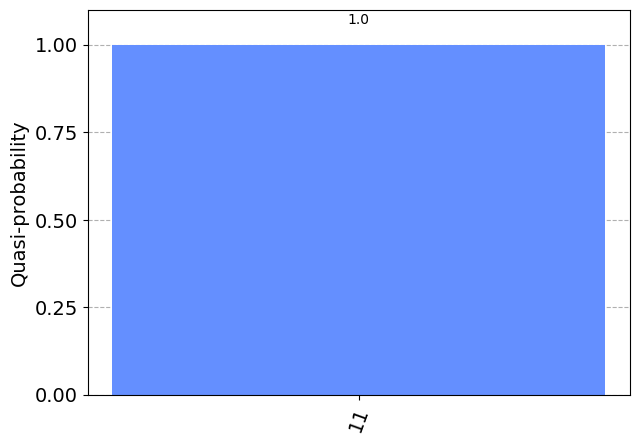

In [14]:
three_sampled = PSampler() \
    .run(three_steps, shots=2**11) \
    .result() \
    .quasi_dists[0] \
    .binary_probabilities()
plot_histogram(three_sampled)

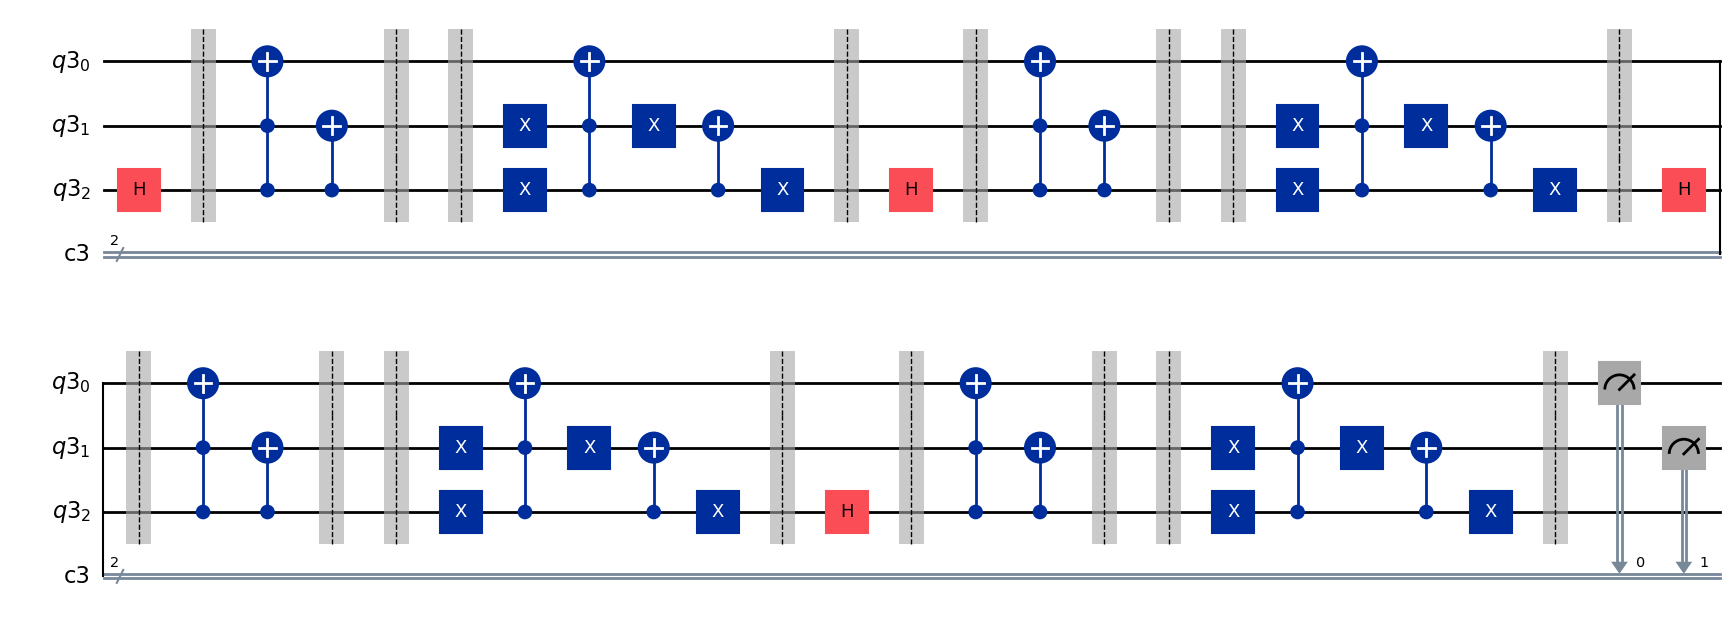

In [15]:
# steps 4

qr4, cr4 = QuantumRegister(3), ClassicalRegister(2)
four_steps = QuantumCircuit(qr4, cr4)

walker_steps(qr4, cr4, four_steps, 4, True)
four_steps.draw('mpl')

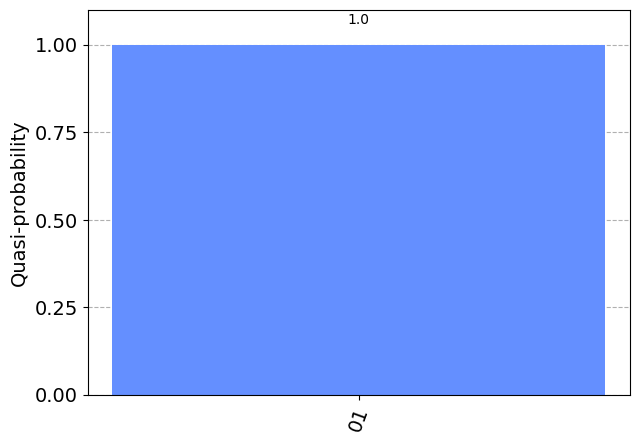

In [16]:
four_sampled = PSampler() \
    .run(four_steps, shots=2**11) \
    .result() \
    .quasi_dists[0] \
    .binary_probabilities()
plot_histogram(four_sampled)

## Na prawdziwym komputerze

In [17]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(
  channel='ibm_quantum',
  instance='ibm-q/open/main',
  token='d7caeee0ec77e54a7845693845a41b6aaf751adfd9f99d59a11c1b5bdc21364424be4323034dba212f5ae5dcea92be992e8096085df40823d62b159715ff7784'
)
backend=service.backend('ibm_osaka')
backend.name

'ibm_osaka'

In [18]:
from qiskit import transpile

# one_step.measure_all()
one_step_real_measured = transpile(one_step, backend, optimization_level=3, seed_transpiler=0)

# two_steps.measure_all()
two_steps_real_measured = transpile(two_steps, backend, optimization_level=3, seed_transpiler=0)

# three_steps.measure_all()
three_steps_real_measured = transpile(three_steps, backend, optimization_level=3, seed_transpiler=0)

# four_steps.measure_all()
four_steps_real_measured = transpile(four_steps, backend, optimization_level=3, seed_transpiler=0)


In [22]:
from qiskit_ibm_runtime import Batch, Sampler

# with Batch(service=service, backend=backend):
#     sampler = Sampler()
#     job = sampler.run(
#         circuits=[one_step_real_measured],
#         shots=10000)

# with Batch(service=service, backend=backend):
#     sampler = Sampler()
#     job = sampler.run(
#         circuits=[two_steps_real_measured],
#         shots=10000)

# with Batch(service=service, backend=backend):
#     sampler = Sampler()
#     job = sampler.run(
#         circuits=[three_steps_real_measured],
#         shots=10000)

with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[four_steps_real_measured],
        shots=10000)


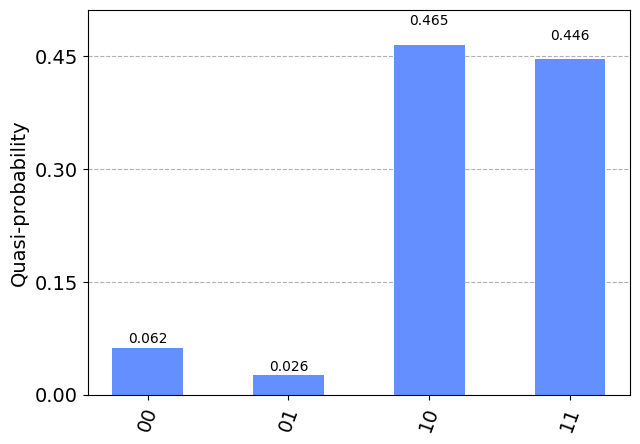

In [28]:
# one step

result_sim = service.job('csnz1qyvnxy0008de75g').result()
one_real = result_sim \
    .quasi_dists[0] \
    .binary_probabilities()
plot_histogram(one_real)


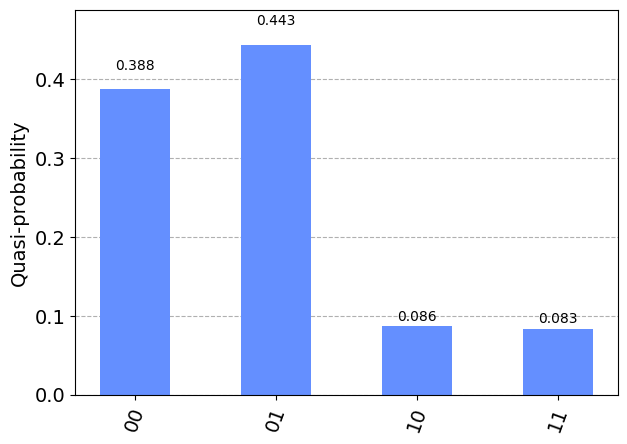

In [29]:
# two steps

result_sim = service.job('csnz1xf0c2pg008c2jn0').result()
two_real = result_sim \
    .quasi_dists[0] \
    .binary_probabilities()
plot_histogram(two_real)

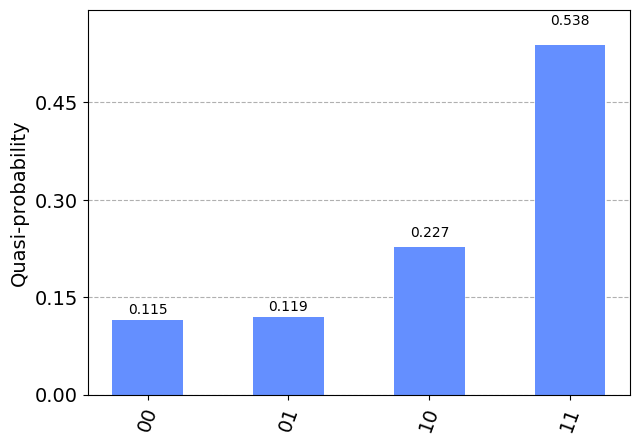

In [30]:
# three steps

result_sim = service.job('csnz1zqea560008fgta0').result()
three_real = result_sim \
    .quasi_dists[0] \
    .binary_probabilities()
plot_histogram(three_real)

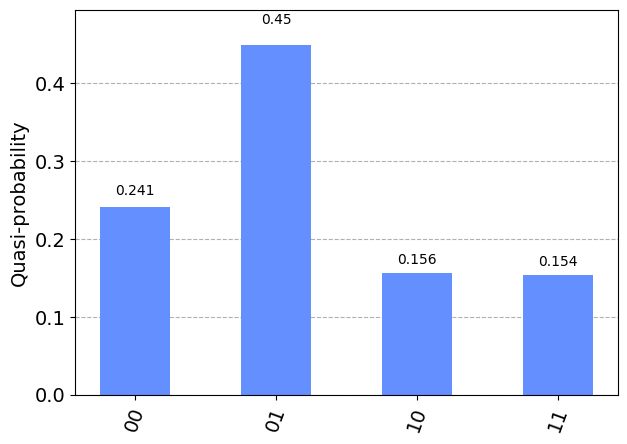

In [31]:
# four steps

result_sim = service.job('csnzbtfvwqp0008b3pb0').result()
four_real = result_sim \
    .quasi_dists[0] \
    .binary_probabilities()
plot_histogram(four_real)

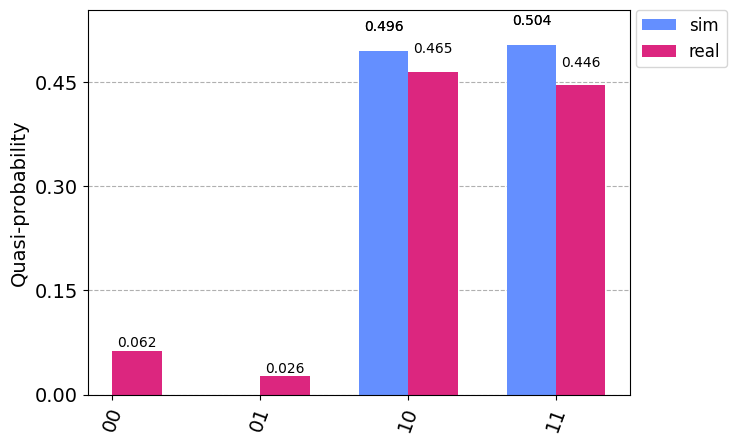

In [32]:
plot_histogram(
    [one_sampled, one_real],
    legend=["sim", "real"]
)

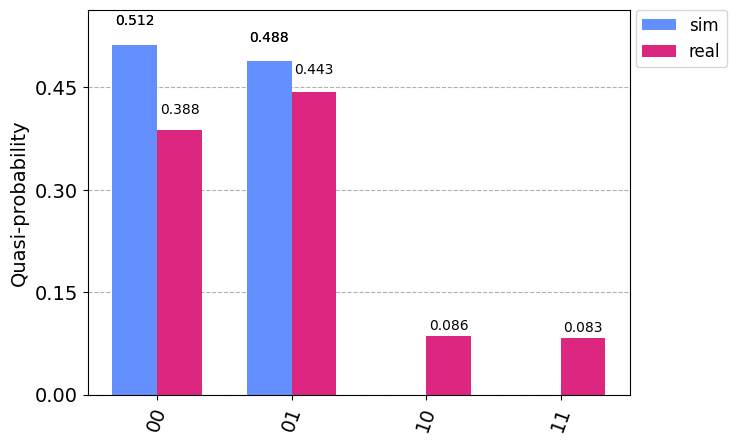

In [33]:
plot_histogram(
    [two_sampled, two_real],
    legend=["sim", "real"]
)

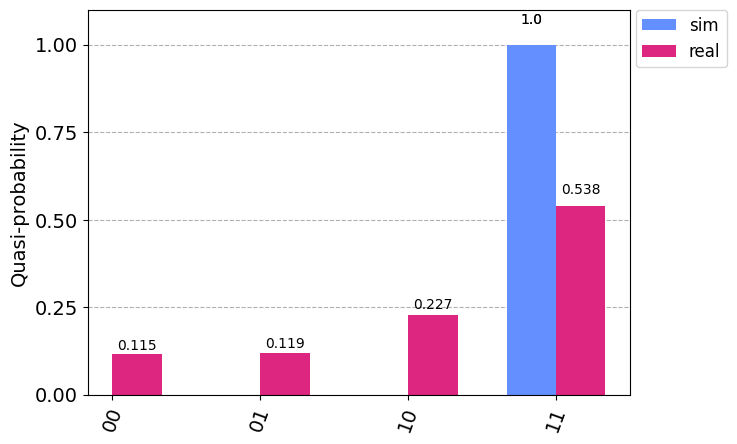

In [34]:
plot_histogram(
    [three_sampled, three_real],
    legend=["sim", "real"]
)

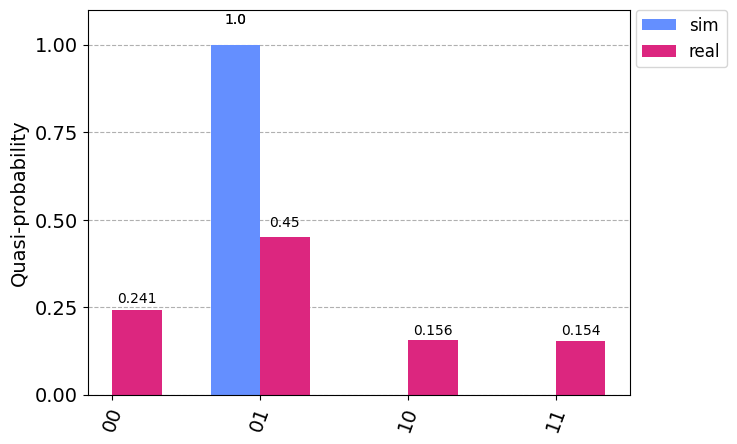

In [35]:
plot_histogram(
    [four_sampled, four_real],
    legend=["sim", "real"]
)

## Wnioski

W idealnym świecie bez błędów kwantowych wyniki otrzymujemy prawie dokładnie takie same jak w teoretycznych obliczeniach po 1 i 2 krokach

W świecie rzeczywistym ze względu na pojawianie się błędów kwantowych mamy niestety coraz większy błąd, np w 4. kroku suma prawdopodobieństw innych stanów niż tego prawdziwego jest większe od prawdziwego stanu 01